In [1]:
!pip install chart_studio

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [3]:
df = pd.read_csv('./data/cardiaco/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
cont_features=[i for i in df.columns if df[i].nunique()>5]
cat_features=[i for i in df.columns if df[i].nunique()<=5]

In [7]:
cont_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [8]:
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

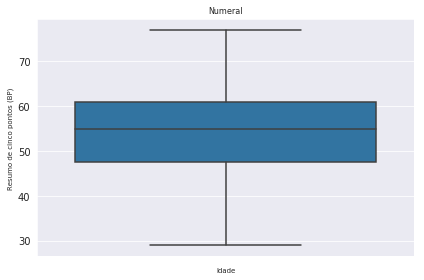

In [9]:
plot10=sns.boxplot(df['age'],orient='v')
plt.title('Numeral',fontdict={'fontsize':8})
plt.xlabel('Idade',fontdict={'fontsize':7})
plt.ylabel(r'Resumo de cinco pontos (BP)',fontdict={'fontsize':7})
plt.tight_layout()

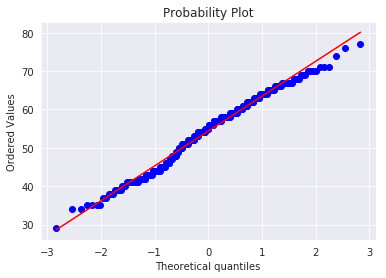

In [10]:
fig = ff.create_distplot([df.age],['age'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)
plt.show()

In [11]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df['age'])

ShapiroResult(statistic=0.9863710999488831, pvalue=0.005800189916044474)

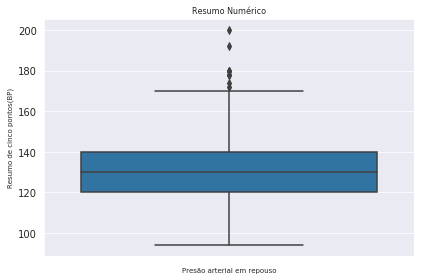

In [13]:
plot10=sns.boxplot(df['trtbps'],orient='v')
plt.title('Resumo Numérico',fontdict={'fontsize':8})
plt.xlabel('Presão arterial em repouso',fontdict={'fontsize':7})
plt.ylabel(r'Resumo de cinco pontos(BP)',fontdict={'fontsize':7})
plt.tight_layout()
Q1 = df['trtbps'].quantile(0.25)
Q3 = df['trtbps'].quantile(0.75)

IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['trtbps'] >= Q1 - 1.5 * IQR) & (df['trtbps'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]  

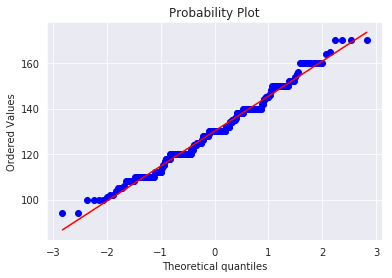

In [15]:
fig = ff.create_distplot([df.trtbps],['trtbps'],bin_size=5)
iplot(fig, filename='Basic Distplot')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df1['trtbps'], plot=plt)
plt.show()

In [16]:
from scipy.stats import shapiro
import scipy.stats as stats
shapiro(df1['thalachh'])

ShapiroResult(statistic=0.9737894535064697, pvalue=3.284952254034579e-05)

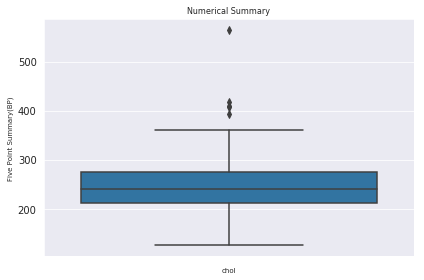

In [17]:
plot10=sns.boxplot(df['chol'],orient='v')
plt.title('Resumo',fontdict={'fontsize':8})
plt.xlabel('Colesterol',fontdict={'fontsize':7})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

In [18]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['chol'] >= Q1 - 1.5 * IQR) & (df['chol'] <= Q3 + 1.5 *IQR)
df1=df.loc[filter]  